In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Rishikesh\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
from sklearn.datasets import load_diabetes

data= load_diabetes()

In [3]:
print(data.DESCR)  ## DESCRIPTION OF DATASETS

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
X= data.data
y = data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=45)

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
y_pred = lr.predict(X_test)

In [9]:
from sklearn.metrics import r2_score,mean_squared_error

In [13]:
print("r2_score is ",r2_score(y_test,y_pred))
print("mean_squared_error is ",np.sqrt(mean_squared_error(y_test,y_pred)))

r2_score is  0.5188113124539249
mean_squared_error is  48.72713760953252


In [15]:
from sklearn.linear_model import Ridge
R = Ridge(alpha=0.0001)

In [16]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [18]:
y_pred1 = R.predict(X_test)

In [19]:
print("r2_score is ",r2_score(y_test,y_pred1))
print("mean_squared_error is ",np.sqrt(mean_squared_error(y_test,y_pred1)))

r2_score is  0.518973263588496
mean_squared_error is  48.718937001819505


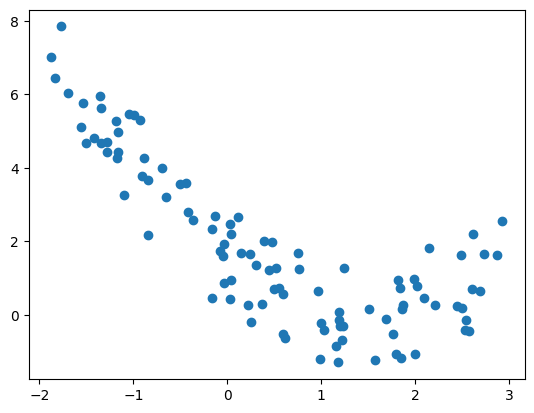

In [20]:
m=100
x1=5 * np.random.rand(m,1) - 2
x2 = 0.7 * x1**2 -2 * x1 + 3 * np.random.rand(m,1)


plt.scatter(x1,x2)
plt.show()

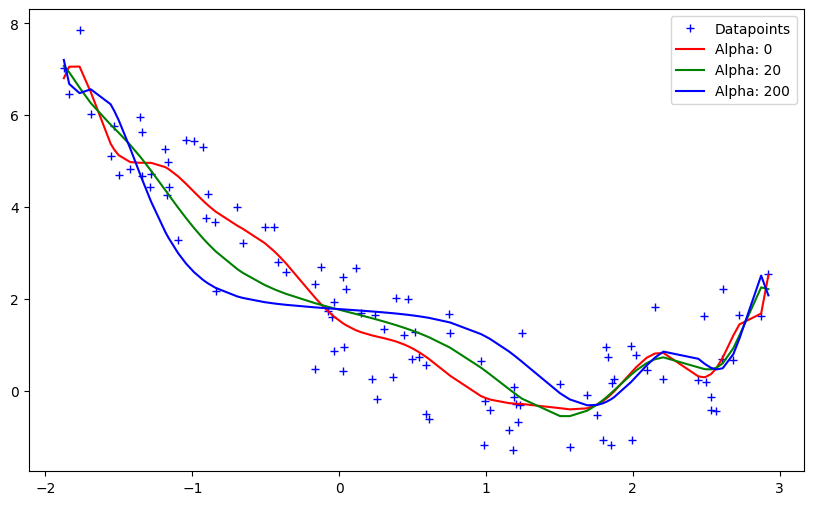

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()